# 七、预测模型
预测正统方法是回归

## 灰色系统预测

### （一）灰色系统理论介绍

#### 1. 什么是灰色系统预测？
所谓灰色系统是指部分信息已知而部分系统未知的系统，灰色系统理论所要考察和研究的是对信息不完备的系统，通过已知信息来研究和预测未知领域从而达到了解整个系统的目的。
**灰色系统理论与概率论、模糊数学**一起并成为研究不确定性系统的三种常用方法。
#### 2. 灰色预测的主要特点
- 模型使用的不是原始数据序列，而是生成的数据序列，即对原始数据作累加生成（或其他方法）得到近似的指数规律再进行建模的方法。
- 优点是**不需要很多的数据**，一般只需要4个数据就足够，能解决历史数据少、序列完整性及可靠性低的问题；能利用**微分方程**来充分挖掘系统的本质，精度高；能将无规律的原始数据进行生成得到规律性较强的生成序列，运算简便，易于检验，具有不考虑分布规律，不考虑变化趋势。
- 缺点是只适用于**中短期预测**，只使用**指数增长的预测**。

#### 3. 数据累加与累减
##### （1）理论介绍
在一些实际问题中，往往会遇到随机干扰，导致一些数据具有很大的波动性。未处理这些问题，提出数据累加和累减的概念。
设原始数据列$\boldsymbol{x}^{(0)}=\left(x^{(0)}(1), x^{(0)}(2), \cdots, x^{(0)}(n)\right)$, 令
$$
x^{(1)}(k)=\sum_{i=1}^{k} x^{(0)}(i), \quad k=1,2, \cdots, n,
$$
得到 $\boldsymbol{x}^{(1)}=\left(x^{(1)}(1), x^{(1)}(2), \cdots, x^{(1)}(n)\right)$，称 $\boldsymbol{x}^{(1)}$ 为 $\boldsymbol{x}^{(0)}$ 的一次累加生成数列.相应地，自然有 $x^{(0)}$ 的 $r$ 次累加生成数列
$$
\boldsymbol{x}^{(r)}=\left(x^{(r)}(1), x^{(r)}(2), \cdots, x^{(r)}(n)\right) ; \quad x^{(r)}(k)=\sum_{i=1}^{k} x^{(r-1)}(i) .
$$
与累加生成对应的运算是累减，它主要用于对累加生成的数据列进行还原。设 $\boldsymbol{x}^{(1)}=\left(x^{(1)}(1), x^{(1)}(2), \cdots, x^{(1)}(n)\right)$，称 $\boldsymbol{x}^{(0)}=\left(x^{(0)}(1), x^{(0)}(2), \cdots, x^{(0)}(n)\right)$ 为 $\boldsymbol{x}^{(1)}$ 的一次累减，其中
$$
x^{(0)}(1)=x^{(1)}(1) ; \quad x^{(0)}(k)=x^{(1)}(k)-x^{(1)}(k-1), \quad k=2,3, \cdots, n .
$$
同理可定义 $r$ 次累减运算。

**注意：** 在实际问题中，一般来说，累加后的数据呈现指数增长即停止累加。同时，在误差检验或预测时，应还原后再进行，**不能**按照累加数据进行**误差计算**或**预测**。

##### （2）序列出现负数处理
累加的主要目的是把**非负**的波动数列转化成具有一定规律性（例如，指数形式单调增加）的数列。如果实际问题中出现**负数**（如温度数列），累加生成就不一定是好的处理办法，因为会出现**正负抵消**现象，这个时候会削弱原始数据的规律性。所以，此时应首先化为非负数列。具体做法是数列中每个数据同时减去原始数列中最小的元素值，得到非负数列后再进行累加运算。当然，在进行误差计算或预测时，应进行相应的逆运算。

##### （3）序列指数形式的判断
**定义：** 级比$\lambda(k) = \frac{x^{(0)}(k-1)}{x^{(0)}(k)} (k=2,3,\dots,n)$，若$\lambda(k)$落在区间$\left(e^{-\frac{2}{n+1}}, e^{\frac{2}{n+1}} \right)$，则称数据列满足指数形式增长。

#### 4. 例题
已知某商品年度销售数据序列为
$$
\boldsymbol{x}^{(0)}=(5.081,4.611,5.1177,9.3775,11.0574,11.0524)
$$
如果直接应用最小二乘法进行线性拟合，得到直线方程 $y=1.5273 k+2.3706$，拟合直线如下图1所示。
由图1看出，所有数据点中，原始数据与拟合直线有一定的差距，最大相对误差为 $35.85 \%$，也就是说拟合效果不理想。对 $\boldsymbol{x}^{(0)}$ 进行一次累加，得到
$$
\boldsymbol{x}^{(1)}=(5.081,9.692,14.8097,24.1872,35.2446,46.297)
$$
对 $x^{(1)}$ 进行拟合, 得到
$$
x^{(1)}(k+1)=15.3915 e^{0.2311 k}-14.7620
$$
由图2可以看到，拟合曲线与累加后的数据非常接近，最大相对误差为 $24.15 \%$，检验时需要进行累减还原，得
$$
\hat{\boldsymbol{x}}^{(0)}=(4.6313,5.0423,6.3534,8.0053,10.0867,12.7093)
$$
比直接线性拟合的最大相对误差减少很多。

累计数据是指数增长
拟合的参数值为： [ 16.6385648    0.37295613 -19.98968081]


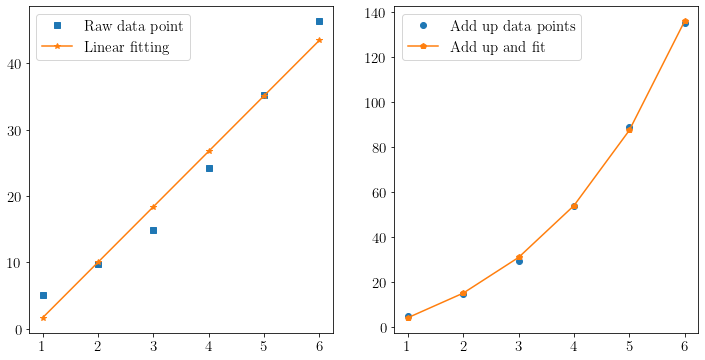

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rc('font', size=15)
plt.rc('font', family='SimHei')
t0 = np.arange(1, 6+1)
x0 = np.array([5.081, 9.692, 14.8097, 24.1872, 35.2446, 46.297])

# 线性拟合预测
xt = np.polyfit(t0, x0, 1)
xh1 = np.polyval(xt, t0) # 计算预测值
delta1 = abs(xh1-x0)/x0 # 计算相对误差

# 累加后拟合
x1 = np.cumsum(x0) # 累加
# 判断是不是指数形式增长
count = 0
for i in range(0, 4+1):
    if x1[i]/x1[i+1] > np.exp(-2/7) and x1[i]/x1[i+1] < np.exp(2/7):
        count += 1
if count == 5:
    print("累计数据是指数增长")
else:
    print("累计数据是指数增长")
xh2 = lambda t, a, b, c: a*np.exp(b*t) + c
para, cov = curve_fit(xh2, t0, x1)
xh21 = xh2(t0, *para) # 计算累加数列的预测值
xh22 = np.r_[xh21[0], np.diff(xh21)] # 计算预测值（累减）
delta2 = np.abs(xh22-x0)/x0 # 计算相对误差
print("拟合的参数值为：", para)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(t0, x0, 's')
plt.plot(t0, xh1, '*-')
plt.legend(('Raw data point', 'Linear fitting'), loc='upper left')
plt.subplot(122)
plt.plot(t0, x1, 'o')
plt.plot(t0, xh21, 'p-')
plt.legend(('Add up data points', 'Add up and fit'), loc='upper left')
plt.show()

### （二）灰色GM(1,1)预测模型
$\mathrm{GM}(1,1)$ 模型适用于具有**较强指数规律**的序列，只能描述**单调的变化过程**，对于**非单调的摆动发展序列**或**有饱和的** $S$形序列，可以考虑建立 $\mathrm{GM}(2,1)$，DGM 和 Verhulst 模型。

灰色模型：Grey Model, GM
数据序列在累加后旺现出指数形式的单调递增规律，联想到微分方程 $y^{\prime}=a y$ 具有指数形式的解 $y=e^{a x}$，由此提出一阶灰色方程模型，即 $\mathrm{GM}(1,1)$ 模型，其中的第1个1表示1阶微分方程，第2个1表示只含1个变量的灰色模型。
已知参考数据列$\boldsymbol{x}^{(0)}=\left(x^{(0)}(1), x^{(0)}(2), \cdots, x^{(0)}(n)\right)$，1次累加生成序列(1-AGO)
$$
\begin{aligned}
\boldsymbol{x}^{(1)} &=\left(x^{(1)}(1), x^{(1)}(2), \cdots, x^{(1)}(n)\right) \\
&=\left(x^{(0)}(1), x^{(0)}(1)+x^{(0)}(2), \cdots, x^{(0)}(1)+\cdots+x^{(0)}(n)\right),
\end{aligned}
$$
其中 $x^{(1)}(k)=\sum_{i=1}^{k} x^{(0)}(i)(k=1,2, \cdots, n)$. $\boldsymbol{x}^{(1)}$ 的均值生成序列
$$
\boldsymbol{z}^{(1)}=\left(z^{(1)}(2), z^{(1)}(3), \cdots, z^{(1)}(n)\right)
$$
其中 $z^{(1)}(k)=0.5 x^{(1)}(k)+0.5 x^{(1)}(k-1), k=2,3, \cdots, n$.
#### 1. GM(1,1)模型预测步骤

##### （1）数据的检验与处理
首先，为了保证建模方法的可行性，需要对已知数据列作必要的检验处理。计算参考序列的级比
$$
\lambda(k)=\frac{x^{(0)}(k-1)}{x^{(0)}(k)}, \quad k=2,3, \cdots, n
$$
如果所有的级比 $\lambda(k)$ 都落在可容覆盖 $\Theta=\left(e^{-\frac{2}{n+1}}, e^{\frac{2}{n+1}}\right)$ 内，则序列 $\boldsymbol{x}^{(0)}$ 可以作为模型 $\mathrm{GM}(1,1)$ 的数据进行灰色预测。否则，需要对序列 $\boldsymbol{x}^{(0)}$ 作必要的变换处理，使其落入可容覆盖内。即取适当的正常数$c$，作平移变换
$$
y^{(0)}(k)=x^{(0)}(k)+c, \quad k=1,2, \cdots, n
$$
使序列 $\boldsymbol{y}^{(0)}=\left(y^{(0)}(1), y^{(0)}(2), \cdots, y^{(0)}(n)\right)$ 的级比
$$
\lambda_{y}(k)=\frac{y^{(0)}(k-1)}{y^{(0)}(k)} \in \Theta, \quad k=2,3, \cdots, n
$$
满足要求。

##### （2）建立模型
建立微分方程模型
\begin{equation*}
\frac{d x^{(1)}(t)}{d t}+a x^{(1)}(t)=b
\tag{(1)}
\end{equation*}
该模型是 1 阶 1 个变量的微分方程，记为 $\operatorname{GM}(1,1)$.
为了辨识模型参数 $a, b$，在区间 $k-1<t \leqslant k$ 上，令
$$
\begin{gathered}
x^{(1)}(t)=z^{(1)}(k)=\frac{1}{2}\left[x^{(1)}(k-1)+x^{(1)}(k)\right], \\
\frac{d x^{(1)}(t)}{d t}=x^{(1)}(k)-x^{(1)}(k-1)=x^{(0)}(k) .
\end{gathered}
$$
则式(1)化为离散模型
\begin{equation}
x^{(0)}(k)+a z^{(1)}(k)=b, \quad k=2,3, \cdots, n .
\tag{(2)}
\end{equation}
式(2)称为灰色微分方程, 式(1)称为对应的白化方程.
记 $\boldsymbol{u}=[a, b]^{\mathrm{T}}, \boldsymbol{Y}=\left[x^{(0)}(2), x^{(0)}(3), \cdots, x^{(0)}(n)\right]^{\mathrm{T}}, \boldsymbol{B}=\left[\begin{array}{cc}-z^{(1)}(2) & 1 \\ -z^{(1)}(3) & 1 \\ \vdots & \vdots \\ -z^{(1)}(n) & 1\end{array}\right]$，则由
最小二乘法，求得使 $J(\boldsymbol{u})=(\boldsymbol{Y}-\boldsymbol{B} \boldsymbol{u})^{\mathrm{T}}(\boldsymbol{Y}-\boldsymbol{B} \boldsymbol{u})$ 达到最小值的 $\boldsymbol{u}$ 的估计值
$$
\hat{\boldsymbol{u}}=[\hat{a}, \hat{b}]^{\mathrm{T}}=\left(\boldsymbol{B}^{\mathrm{T}} \boldsymbol{B}\right)^{-1} \boldsymbol{B}^{\mathrm{T}} \boldsymbol{Y} .
$$
于是求解方程(1)，得
$$
\hat{x}^{(1)}(t)=\left(x^{(0)}(1)-\frac{\hat{b}}{\hat{a}}\right) e^{-\hat{a} (t-1)}+\frac{\hat{b}}{\hat{a}}
$$
即得到预测值
$$
\hat{x}^{(1)}(k+1)=\left(x^{(0)}(1)-\frac{\hat{b}}{\hat{a}}\right) e^{-\hat{a} k}+\frac{\hat{b}}{\hat{a}}, \quad k=0,1,2, \cdots,
$$
而且 $\hat{x}^{(0)}(1)=\hat{x}^{(1)}(1), \hat{x}^{(0)}(k+1)=\hat{x}^{(1)}(k+1)-\hat{x}^{(1)}(k), k=1,2, \cdots$.

##### （3）误差检验
可以使用如下两种检验方式
###### a) 相对误差检验
计算相对误差
$$
\delta(k)=\frac{\left|x^{(0)}(k)-\hat{x}^{(0)}(k)\right|}{x^{(0)}(k)}, \quad k=1,2, \cdots, n
$$
这里 $\hat{x}^{(0)}(1)=x^{(0)}(1)$. 如果 $\delta(k)<0.2$，则可认为达到一般要求；如果 $\delta(k)<0.1$，则认为达到较高的要求.
###### b) 级比偏差值检验
首先由参考序列计算出级比 $\lambda(k)$，再用**发展系数** $\hat{a}$ 求出相应的级比偏差
$$
\rho(k)=\left|1-\left(\frac{1-0.5 \hat{a}}{1+0.5 \hat{a}}\right) \lambda(k)\right|, \quad k=2,3, \cdots, n
$$
如果 $\rho(k)<0.2$，则可认为达到一般要求；如果 $\rho(k)<0.1$，则认为达到较高的要求。
##### （4） 预测预报
由 $\mathrm{GM}(1,1)$ 模型得到指定点的预测值，根据实际问题的需要，给出相应的预测预报。



#### 2. GM(1,1)模型预测实例
由1995~2001年中国蔬菜产量，具体数据见下表，建立模型预测2002年中国蔬菜产量，并对预测结果作检验。
\begin{array}{cccccccc}
\hline 年份 & 1995 & 1996 & 1997 & 1998 & 1999 & 2000 & 2001 \\
\hline 产量 & 25723 & 30379 & 34473 & 38485 & 40514 & 42400 & 48337 \\
\hline
\end{array}
##### （1）数据的检验
记1995~2001年的蔬菜产量分别为 $x^{(0)}(1), x^{(0)}(2), \cdots, x^{(0)}(7)$，构造参考序列 $\boldsymbol{x}^{(0)}=\left(x^{(0)}(1), x^{(0)}(2), \cdots, x^{(0)}(7)\right)$，经检验级比符合要求，参考序列 $\boldsymbol{x}^{(0)}$ 可以用来建立 $\operatorname{GM}(1,1)$ 模型。
##### （2）模型的建立与求解
构造累加序列
$$
\begin{aligned}
\boldsymbol{x}^{(1)} &=\left(x^{(1)}(1), x^{(1)}(2), \cdots, x^{(1)}(7)\right) \\
&=\left(x^{(0)}(1), x^{(0)}(1)+x^{(0)}(2), \cdots, x^{(0)}(1)+\cdots+x^{(0)}(7)\right)
\end{aligned}
$$
和 $\boldsymbol{x}^{(1)}$ 的均值生成序列
$$
\boldsymbol{z}^{(1)}=\left(z^{(1)}(2), z^{(1)}(3), \cdots, z^{(1)}(7)\right)
$$
其中 $z^{(1)}(k)=0.5 x^{(1)}(k)+0.5 x^{(1)}(k-1), k=2,3, \cdots 7$.
将
$$
\boldsymbol{Y}=\left[\begin{array}{c}
x^{(0)}(2) \\
x^{(0)}(3) \\
\vdots \\
x^{(0)}(7)
\end{array}\right], \quad \boldsymbol{B}=\left[\begin{array}{cc}
-z^{(1)}(2) & 1 \\
-z^{(1)}(3) & 1 \\
\vdots & \vdots \\
-z^{(1)}(7) & 1
\end{array}\right]
$$
得参数的估计值
$$
\hat{\boldsymbol{u}}=\left[\hat{a}, \hat{b}^{\mathrm{T}}=\left(\boldsymbol{B}^{\mathrm{T}} \boldsymbol{B}\right)^{-1} \boldsymbol{B}^{\mathrm{T}} \boldsymbol{Y}=\left[\begin{array}{c}
-0.0843 \\
27858.4508
\end{array}\right],\right.
$$
得 $\operatorname{GM}(1,1)$ 模型为
(1) 灰微分方程: $x^{(0)}(k)-0.0843 z^{(1)}(k)=27858.4508$.
(2) 白化方程: $\frac{d x^{(1)}(t)}{d t}-0.0843 x^{(1)}(t)=27858.4508$.
(3) 白化方程的时间响应式:
\begin{equation}
\hat{x}^{(1)}(k+1)=356328.9910 e^{0.0843 k}-330605.9910 .
\tag{(3)}
\end{equation}
##### （3）模型检验与预测
利用(3)式求得累加生成序列的预测值 $\hat{\boldsymbol{x}}^{(1)}=\left(\hat{x}^{(1)}(1), \hat{x}^{(1)}(2), \cdots, \hat{x}^{(1)}(8)\right)$，由 $\hat{x}^{(0)}(1)=\hat{x}^{(1)}(1), \hat{x}^{(0)}(k+1)=\hat{x}^{(1)}(k+1)-\hat{x}^{(1)}(k), k=1,2, \cdots, 7$ ,得 $\hat{\boldsymbol{x}}^{(0)}=$ $\left(\hat{x}^{(0)}(1), \hat{x}^{(0)}(2), \cdots, \hat{x}^{(0)}(8)\right)$，即得到1995~2002年的预测值见下表。画出预测值与实际值的变化曲线如下图所示.

\begin{array}{ccccc}
\hline \text { 年份 } & \text { 实际数据 } \boldsymbol{x}^{(0)} & \text { 预测数据 } \hat{\boldsymbol{x}}^{(0)} & \text { 残差 } \boldsymbol{x}^{(0)}-\hat{\boldsymbol{x}}^{(0)} & \text { 相对误差 } \delta(k) / \% \\
\hline 1995 & 25723 & 25723 & 0 & 0 \\
1996 & 30379 & 31327.3567 & -948.3567 & 3.12 \\
1997 & 34473 & 34081.5622 & 391.4378 & 1.14 \\
1998 & 38485 & 37077.9091 & 1407.0909 & 3.66 \\
1999 & 40514 & 40337.6857 & 176.3143 & 0.44 \\
2000 & 42400 & 43884.0518 & -1484.0518 & 3.50 \\
2001 & 48337 & 47742.2036 & 594.7964 & 1.23 \\
2002 & & 51939.5524 & & \\
\hline
\end{array}

级比符合要求
1995~2002的预测值： [25723.         31327.3567122  34081.56224489 37077.90911705
 40337.68565577 43884.05179287 47742.20361062 51939.55235392]

-----------------
 相对误差 [0.         3.12175092 1.13549083 3.65620601 0.43519362 3.50012215
 1.23051987]


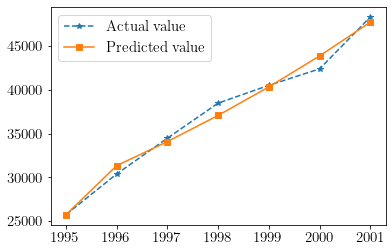

In [ ]:
# GM(1,1)例题程序
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plt.rc('font', size=15)
plt.rc('font', family='SimHei')
x0 = np.array([25723, 30379, 34473, 38485, 40514, 42400, 48337])

# 求级比
n = len(x0)
jibi = x0[:-1]/x0[1:]
bound1 = [jibi.min(), jibi.max()] # 级比范围
bound2 = [np.exp(-2/(n+1)), np.exp(2/(n+1))] # 级比容许范围
if bound1[0] > bound2[0] and bound1[-1] < bound2[-1]:
    print("级比符合要求")
else:
    print("级比不符合要求")

x1 = np.cumsum(x0) # 累加序列
z = (x1[:-1]+x1[1:])/2.0 # 均值生成序列
B = np.vstack([-z, np.ones(n-1)]).T
u = np.linalg.pinv(B)@x0[1:] # 最小二乘法拟合参数，pinv(B)计算矩阵B的伪逆

sp.var('t') # 定义符号变量
sp.var('x', cls=sp.Function) # 定义符号函数
eq = x(t).diff(t) + u[0]*x(t) - u[1] # 定义符号微分方程
xt = sp.dsolve(eq, ics={x(0):x0[0]}) # 求解符号微分方程
xt = xt.args[1] # 提取方程中的符号解
xt = sp.lambdify(t, xt, 'numpy') # 转换为匿名函数

t = np.arange(n+1)
xt1 = xt(t) # 求模型的预测值
x0_pred = np.hstack([x0[0], np.diff(xt1)]) # 还原数据
x2002 = x0_pred[-1] # 提取2002年的预测值
cha = x0 - x0_pred[:-1]
delta = np.abs(cha/x0)*100

print('1995~2002的预测值：', x0_pred)
print('\n-----------------\n', '相对误差', delta)
t0 = np.arange(1995, 2002)
plt.plot(t0, x0, '*--')
plt.plot(t0, x0_pred[:-1], 's-')
plt.legend(('Actual value', 'Predicted value'))
plt.xticks(np.arange(1995, 2002))
plt.show()

### （三）灰色GM(1,N)预测模型

#### 1.GM(1,N)模型预测步骤
设系统有 $N$ 个指标变量，对应的参考序列分别为
$$
\boldsymbol{x}_{i}^{(0)}=\left(x_{i}^{(0)}(1), x_{i}^{(0)}(2), \cdots, x_{i}^{(0)}(n)\right), \quad i=1,2, \cdots, N
$$
作累加运算 $x_{i}^{(1)}(k)=\sum_{j=1}^{k} x_{i}^{(0)}(j)$，可得累加生成数列
$$
\boldsymbol{x}_{i}^{(1)}=\left(x_{i}^{(1)}(1), x_{i}^{(1)}(2), \cdots, x_{i}^{(1)}(n)\right), \quad i=1,2, \cdots, N
$$
微分方程
\begin{equation}
\frac{d x_{1}^{(1)}(t)}{d t}+a_{1} x_{1}^{(1)}(t)=a_{2} x_{2}^{(1)}(t)+a_{3} x_{3}^{(1)}(t)+\cdots+a_{N} x_{N}^{(1)}(t)
\tag{(4)}
\end{equation}
是 1 阶 $N$ 个变量的微分方程模型，记为 $\operatorname{GM}(1, N)$.
类似地，当 $k-1<t \leqslant k$ 时，令
$$
\begin{gathered}
\frac{d x_{1}^{(1)}(t)}{d t}=x_{1}^{(1)}(k)-x_{1}^{(1)}(k-1)=x_{1}^{(0)}(k), \quad k=2,3, \cdots, n, \\
x_{i}^{(1)}(t)=z_{i}^{(1)}(k)=\frac{1}{2}\left(x_{i}^{(1)}(k-1)+x_{i}^{(1)}(k)\right), \quad i=1,2, \cdots, N ; k=2,3, \cdots, n .
\end{gathered}
$$
将(4)式化成离散模型
\begin{equation}
x_{1}^{(0)}(k)+a_{1} z_{1}^{(1)}(k)=a_{2} z_{2}^{(1)}(k)+a_{3} z_{3}^{(1)}(k)+\cdots+a_{N} z_{N}^{(1)}(k), \quad k=2,3, \cdots, n .
\tag{(5)}
\end{equation}
可以证明(5)式是(4)式的二阶精度数值模型.
记
$$
\boldsymbol{u}=\left[\begin{array}{c}
a_{1} \\
a_{2} \\
\vdots \\
a_{N}
\end{array}\right], \quad \boldsymbol{Y}=\left[\begin{array}{c}
x^{(0)}(2) \\
x^{(0)}(3) \\
\vdots \\
x^{(0)}(n)
\end{array}\right], \quad \boldsymbol{B}=\left[\begin{array}{cccc}
-z_{1}^{(1)}(2) & z_{2}^{(1)}(2) & \cdots & z_{N}^{(1)}(2) \\
-z_{1}^{(1)}(3) & z_{2}^{(1)}(3) & \cdots & z_{N}^{(1)}(3) \\
\vdots & \vdots & & \vdots \\
-z_{1}^{(1)}(n) & z_{2}^{(1)}(n) & \cdots & z_{N}^{(1)}(n)
\end{array}\right]
$$
可将(5)式化为 $\boldsymbol{B u}=\boldsymbol{Y}$，则可以得到 $\boldsymbol{u}$ 的最小二乘估计值
$$
\hat{\boldsymbol{u}}=\left[\begin{array}{c}
\hat{a}_{1} \\
\hat{a}_{2} \\
\vdots \\
\hat{a}_{N}
\end{array}\right]=\left(\boldsymbol{B}^{\mathrm{T}} \boldsymbol{B}\right)^{-1} \boldsymbol{B}^{\mathrm{T}} \boldsymbol{Y}
$$
求出(4)式的数值解，就得到 $x_{1}^{(1)}(k)(k=1,2, \cdots)$的预测值 $\hat{x}_{1}^{(1)}(k)(k=1,2, \cdots)$，还原到 $\hat{x}_{1}^{(0)}(k)(k=1,2, \cdots)$，就得到 $x_{0}^{(1)}(k)(k=1,2, \cdots)$，的预测值.

#### 2.GM(1,N)模型预测实例
我国某油田 $\mathrm{S}$ 油藏自 1994 年 2 月至 1995 年 2 月的开发动态数据见下表，试建立预测模型，并预测 1995 年 3 月月产油量、月产水量、月注水量和 地层压力的取值.
\begin{array}{cccccc}
\hline \text { 序号 } & \text { 时间 } & \text { 月产油量/万吨 } & \text { 月产水量/万吨 } & \text { 月注水量/万吨 } & \text { 地层压力/MPa } \\
\hline 1 & 94.02 & 7.123 & 0.796 & 13.108 & 27.475 \\
2 & 94.03 & 7.994 & 0.832 & 12.334 & 27.473 \\
3 & 94.04 & 8.272 & 0.917 & 12.216 & 27.490 \\
4 & 94.05 & 7.960 & 0.976 & 12.201 & 27.500 \\
5 & 94.06 & 7.147 & 1.075 & 12.132 & 27.510 \\
6 & 94.07 & 7.092 & 1.121 & 11.990 & 27.542 \\
7 & 94.08 & 6.858 & 1.281 & 11.926 & 27.536 \\
8 & 94.09 & 5.804 & 1.350 & 10.478 & 27.550 \\
9 & 94.10 & 6.433 & 1.410 & 9.176 & 27.567 \\
10 & 94.11 & 6.354 & 1.432 & 11.368 & 27.584 \\
11 & 94.12 & 6.254 & 1.507 & 12.764 & 27.600 \\
12 & 95.01 & 5.197 & 1.559 & 11.143 & 27.602 \\
13 & 95.02 & 5.654 & 1.611 & 10.737 & 27.630 \\
\hline
\end{array}

**解：** 用 $x_{1}, x_{2}, x_{3}, x_{4}$ 分别表示月产油量、月产水量、月注水量和地层压力，它们的观测值分别记作 $\boldsymbol{x}_{i}^{(0)}=\left(x_{i}^{(0)}(1), x_{i}^{(0)}(2), \cdots, x_{i}^{(0)}(13)\right)(i=1,2,3,4)$.
对月产油量 $x_{1}$，建立 $\operatorname{GM}(1,1)$ 模型；月产水量 $x_{2}$ 受月产油量及油藏水驱规律的控制，因此对 $x_{2}$ 建立与 $x_{1}$ 相关的 $\mathrm{GM}(1,2)$ 模型；对月注水量 $x_{3}$，建立 $\mathrm{GM}(1,1)$ 模型；地层压力 $x_{4}$ 与采注关系密切，是地层能量的综合反映，因此对 $x_{4}$ 建立与$x_{1}, x_{3}$ 相关的 $\mathrm{GM}(1,3)$ 模型。综上所述，系统的 4 个开发指标所满足的状态方程为

\begin{equation}
\begin{cases}
\frac{d x_{1}^{(1)}(t)}{d t}=a_{11} x_{1}^{(1)}(t)+b_{1} \\
\frac{d x_{2}^{(1)}(t)}{d t}=a_{21} x_{1}^{(1)}(t)+a_{22} x_{2}^{(1)}(t) \\
\frac{d x_{3}^{(1)}(t)}{d t}=a_{33} x_{3}^{(1)}(t)+b_{3} \\
\frac{d x_{4}^{(1)}(t)}{d t}=a_{41} x_{1}^{(1)}(t)+a_{43} x_{3}^{(1)}(t)+a_{44} x_{4}^{(1)}(t)
\end{cases}
\tag{(6)}
\end{equation}

将(6)式改写为矩阵方程
\begin{equation}
\frac{d \boldsymbol{X}^{(1)}(t)}{d t}=\boldsymbol{A} \boldsymbol{X}^{(1)}(t)+\tilde{\boldsymbol{B}}
\tag{(7)}
\end{equation}
式中，
$$
\begin{aligned}
& \frac{d \boldsymbol{X}^{(1)}(t)}{d t}=\left[\frac{d x_{1}^{(1)}(t)}{d t}, \frac{d x_{2}^{(1)}(t)}{d t}, \frac{d x_{3}^{(1)}(t)}{d t}, \frac{d x_{4}^{(1)}(t)}{d t}\right]^{\mathrm{T}} \\
\boldsymbol{X}^{(1)}(t)=& {\left[\begin{array}{c}
x_{1}^{(1)}(t) \\
x_{2}^{(1)}(t) \\
x_{3}^{(1)}(t) \\
x_{4}^{(1)}(t)
\end{array}\right], \quad \boldsymbol{A}=\left[\begin{array}{cccc}
a_{11} & 0 & 0 & 0 \\
a_{21} & a_{22} & 0 & 0 \\
0 & 0 & a_{33} & 0 \\
a_{41} & 0 & a_{43} & a_{44}
\end{array}\right], \quad \tilde{\boldsymbol{B}}=\left[\begin{array}{c}
b_{1} \\
0 \\
b_{3} \\
0
\end{array}\right] }
\end{aligned}
$$

利用上面介绍的最小二乘法，依次辨识式(6)中每个方程中的系数 $a_{11}, b_{1} ; a_{21}, a_{22} ;$ $a_{33}, b_{3} ; a_{41}, a_{43}, a_{44}$. 计算 4 次得到
$$
\boldsymbol{A}=\left[\begin{array}{cccc}
-0.0378 & 0 & 0 & 0 \\
0.0568 & -0.2232 & 0 & 0 \\
0 & 0 & -0.0114 & 0 \\
-0.6179 & 0 & 5.6950 & -2.1926
\end{array}\right], \quad \tilde{\boldsymbol{B}}=\left[\begin{array}{c}
8.6667 \\
0 \\
12.4938 \\
0
\end{array}\right] .
$$
以表中1994年2月的月产油量、月产水量、月注水量、地层压力的数据为初值，得如下初值问题:
$$
\begin{equation}
\left\{\begin{array}{l}
\frac{d \boldsymbol{X}^{(1)}(t)}{d t}=\boldsymbol{A} \boldsymbol{X}^{(1)}(t)+\tilde{\boldsymbol{B}} \\
\boldsymbol{X}^{(1)}(1)=[7.123,0.796,13.108,27.475]
\end{array}\right.
\tag{(8)}
\end{equation}
$$
利用 Python 软件求微分方程组式(8)的数值解，可以得到 $\boldsymbol{X}^{(1)}(k)(k=2$, $3, \cdots, 14)$ 的数值解，具体的计算结果就不列举了。从程序运行结果可以看出，模拟值与实际值符合较好，但有一个注水量的预测值的相对误差较大。1995 年 3 月 $x_{1}, x_{2}, x_{3}, x_{4}$ 的预测值分别为 $5.2347,1.4599$, $10.7070,26.5756$.

预测值
 [[ 7.123       0.796      13.108      27.475     ]
 [ 8.24060359  0.42241534 12.27456009 21.82165342]
 [ 7.93481492  0.74941597 12.13559638 28.64289129]
 [ 7.64037331  0.99573608 11.99820591 29.16758865]
 [ 7.35685771  1.17808103 11.86237089 28.98320635]
 [ 7.08386269  1.30979354 11.72807368 28.71977504]
 [ 6.82099784  1.40152706 11.5952969  28.448388  ]
 [ 6.56788726  1.46178468 11.46402331 28.1771159 ]
 [ 6.324169    1.49734979 11.33423591 27.90692124]
 [ 6.08949453  1.51363033 11.20591788 27.63796262]
 [ 5.86352826  1.5149357  11.07905256 27.37030393]
 [ 5.64594704  1.50469625 10.95362352 27.10399581]
 [ 5.43643974  1.48564007 10.8296145  26.83909157]
 [ 5.23470673  1.45993391 10.70700942 26.57561822]]
------------------------------------------------------------
残差
 [[ 0.          0.          0.          0.        ]
 [-0.24660359  0.40958466  0.05943991  5.65134658]
 [ 0.33718508  0.16758403  0.08040362 -1.15289129]
 [ 0.31962669 -0.01973608  0.20279409 -1.66758865]
 [-0.209857

Text(0.5, 1.0, 'Formation pressure')

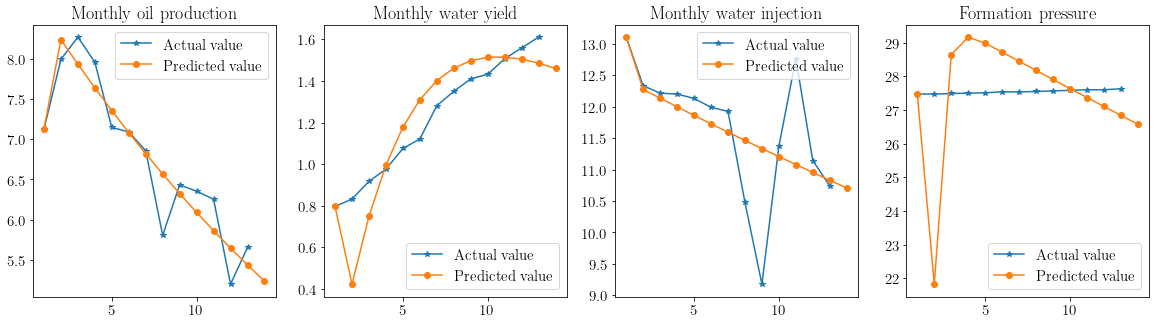

In [ ]:
# GM(1,N)例题程序
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

plt.rc('font', size=15)
plt.rc('font', family='SimHei')

a = np.array([[7.123, 0.796, 13.108, 27.475],
              [7.994, 0.832, 12.334, 27.473],
              [8.272, 0.917, 12.216, 27.490],
              [7.960, 0.976, 12.201, 27.500],
              [7.147, 1.075, 12.132, 27.510],
              [7.092, 1.121, 11.990, 27.542],
              [6.858, 1.281, 11.926, 27.536],
              [5.804, 1.350, 10.478, 27.550],
              [6.433, 1.410, 9.176,  27.567],
              [6.354, 1.432, 11.368, 27.584],
              [6.254, 1.507, 12.764, 27.600],
              [5.197, 1.559, 11.143, 27.602],
              [5.654, 1.611, 10.737, 27.630],
])
n = a.shape[0] # 观测数据的个数
x10 = a[:, 0]
x20 = a[:, 1]
x30 = a[:, 2]
x40 = a[:, 3]

# 累加和
x11 = np.cumsum(x10)
x21 = np.cumsum(x20)
x31 = np.cumsum(x30)
x41 = np.cumsum(x40)

# 均值生成序列
z1 = (x11[:-1]+x11[1:])/2
z2 = (x21[:-1]+x21[1:])/2
z3 = (x31[:-1]+x31[1:])/2
z4 = (x41[:-1]+x41[1:])/2

B1 = np.c_[z1, np.ones((n-1, 1))]
u1 = np.linalg.pinv(B1).dot(x10[1:])
# print(u1)
B2 = np.c_[z1, z2]
u2 = np.linalg.pinv(B2).dot(x20[1:])
# print(u2)
B3 = np.c_[z3, np.ones((n-1, 1))]
u3 = np.linalg.pinv(B3).dot(x30[1:])
# print(u3)
B4 = np.c_[z1, z3, z4]
u4 = np.linalg.pinv(B4).dot(x40[1:])
# print(u4)

def Pfun(x, t):
    '''
    return很容易写错，要细心。
    '''
    x1, x2, x3, x4 = x
    return np.array([u1[0]*x1 + u1[1], u2[0]*x1+u2[1]*x2, u3[0]*x3+u3[1], u4[0]*x1+u4[1]*x3+u4[2]*x4])

t = np.arange(1, 14+1)
X0 = np.array([7.1230, 0.7960, 13.1080, 27.475])
s1 = odeint(Pfun, X0, t)
s2 = np.diff(s1, axis=0)
xh = np.vstack([X0, s2]) # 预测值
print('预测值\n', xh)
print('-'*60)
cha = a - xh[:-1, :] # 计算残差
print('残差\n', cha)
print('-'*60)
delta = np.abs(cha/a) # 计算相对误差
print('相对误差\n', delta)
print('-'*60)
maxd = delta.max(0) # 计算每个指标的最大相对误差
pre = xh[-1, :]
print('最大相对误差为', maxd, '\n预测值为', pre)

plt.figure(figsize=(20, 5))
plt.subplot(141)
plt.plot(np.arange(1, 13+1), a[:, 0], '*-')
plt.plot(np.arange(1, 14+1), xh[:, 0], 'o-')
plt.legend(('Actual value', 'Predicted value'))
plt.title('Monthly oil production')
plt.subplot(142)
plt.plot(np.arange(1, 13+1), a[:, 1], '*-')
plt.plot(np.arange(1, 14+1), xh[:, 1], 'o-')
plt.legend(('Actual value', 'Predicted value'))
plt.title('Monthly water yield')
plt.subplot(143)
plt.plot(np.arange(1, 13+1), a[:, 2], '*-')
plt.plot(np.arange(1, 14+1), xh[:, 2], 'o-')
plt.legend(('Actual value', 'Predicted value'))
plt.title('Monthly water injection')
plt.subplot(144)
plt.plot(np.arange(1, 13+1), a[:, 3], '*-')
plt.plot(np.arange(1, 14+1), xh[:, 3], 'o-')
plt.legend(('Actual value', 'Predicted value'))
plt.title('Formation pressure')

### （四）灰色GM(2,1)预测模型

$\mathrm{GM}(1,1)$ 模型适用于具有**较强指数规律**的序列，只能描述**单调的变化过程**，对于**非单调的摆动发展序列**或**有饱和的** $S$形序列，可以考虑建立 $\mathrm{GM}(2,1)$，DGM 和 Verhulst 模型。下面介绍$\mathrm{GM}(1,1)$ 模型。
#### 1.GM(2,1)模型理论知识
**定义1：** 设原始序列
$$
\boldsymbol{x}^{(0)}=\left(x^{(0)}(1), x^{(0)}(2), \cdots, x^{(0)}(n)\right)
$$
其 1 次累加生成序列 (1-AGO) $\boldsymbol{x}^{(1)}$ 和 1 次累减生成序列 (1-IAGO) $\alpha^{(1)} \boldsymbol{x}^{(0)}$ 分别 为
$$
\boldsymbol{x}^{(1)}=\left(x^{(1)}(1), x^{(1)}(2), \cdots, x^{(1)}(n)\right)
$$
和
$$
\alpha^{(1)} \boldsymbol{x}^{(0)}=\left(\alpha^{(1)} x^{(0)}(2), \cdots, \alpha^{(1)} x^{(0)}(n)\right)
$$
其中
$$
\alpha^{(1)} x^{(0)}(k)=x^{(0)}(k)-x^{(0)}(k-1), \quad k=2,3, \cdots, n
$$
$x^{(1)}$ 的均值生成序列为
$$
\boldsymbol{z}^{(1)}=\left(z^{(1)}(2), z^{(1)}(3), \cdots, z^{(1)}(n)\right)
$$
则称
$$
\alpha^{(1)} x^{(0)}(k)+a_{1} x^{(0)}(k)+a_{2} z^{(1)}(k)=b \quad(k=2,3, \cdots, n)
$$
为 $\operatorname{GM}(2,1)$ 模型。
**定义2：** 称
$$
\frac{d^{2} x^{(1)}(t)}{d t^{2}}+a_{1} \frac{d x^{(1)}(t)}{d t}+a_{2} x^{(1)}(t)=b
$$
为 $\operatorname{GM}(2,1)$ 模型的白化方程。
**定理：** 设 $\boldsymbol{x}^{(0)}, \boldsymbol{x}^{(1)}, \alpha^{(1)} \boldsymbol{x}^{(0)}$ 如定义1所述，且
$$
\begin{aligned}
\boldsymbol{B} &=\left[\begin{array}{ccc}
-x^{(0)}(2) & -z^{(1)}(2) & 1 \\
-x^{(0)}(3) & -z^{(1)}(3) & 1 \\
\vdots & \vdots & \vdots \\
-x^{(0)}(n) & -z^{(1)}(n) & 1
\end{array}\right] \\
\boldsymbol{Y} &=\left[\begin{array}{c}
\alpha^{(1)} x^{(0)}(2) \\
\alpha^{(1)} x^{(0)}(3) \\
\vdots \\
\alpha^{(1)} x^{(0)}(n)
\end{array}\right]=\left[\begin{array}{c}
x^{(0)}(2)-x^{(0)}(1) \\
x^{(0)}(3)-x^{(0)}(2) \\
\vdots \\
x^{(0)}(n)-x^{(0)}(n-1)
\end{array}\right]
\end{aligned}
$$
则 $\operatorname{GM}(2,1)$ 模型参数序列 $\boldsymbol{u}=\left[a_{1}, a_{2}, b\right]^{\mathrm{T}}$ 的最小二乘估计为
$$
\hat{\boldsymbol{u}}=\left(\boldsymbol{B}^{\mathrm{T}} \boldsymbol{B}\right)^{-1} \boldsymbol{B}^{\mathrm{T}} \boldsymbol{Y}
$$

#### 2.GM(2,1)模型预测实例
已知$\boldsymbol{x}^{(0)}=(41, 49, 61, 78, 96, 104)$，试建立$\operatorname{GM}(2,1)$模型。
**解：** $\boldsymbol{x}^{(0)}$ 的 1-AGO 序列 $\boldsymbol{x}^{(1)}$ 和 1-IAGO 序列 $\alpha^{(1)} \boldsymbol{x}^{(0)}$ 分别为
$$
\boldsymbol{x}^{(1)}=(41,90,151,229,325,429), \quad \alpha^{(1)} \boldsymbol{x}^{(0)}=(8,12,17,18,8)
$$
$\boldsymbol{x}^{(1)}$ 的均值生成序列 $\boldsymbol{z}^{(1)}=(65.5,120.5,190,277,377)$，记
$$
\boldsymbol{B}=\left[\begin{array}{ccc}
-x^{(0)}(2) & -z^{(1)}(2) & 1 \\
-x^{(0)}(3) & -z^{(1)}(3) & 1 \\
\vdots & \vdots & \vdots \\
-x^{(0)}(6) & -z^{(1)}(6) & 1
\end{array}\right]=\left[\begin{array}{ccc}
-49 & -65.5 & 1 \\
-61 & -120.5 & 1 \\
-78 & -190 & 1 \\
-96 & -277 & 1 \\
-104 & -377 & 1
\end{array}\right], \quad \boldsymbol{Y}=\left[\begin{array}{c}
8 \\
12 \\
17 \\
18 \\
8
\end{array}\right],
$$
则有
$$
\hat{u}=\left[\begin{array}{c}
\hat{a}_{1} \\
\hat{a}_{2} \\
\hat{b}
\end{array}\right]=\left(\boldsymbol{B}^{\mathrm{T}} \boldsymbol{B}\right)^{-1} \boldsymbol{B}^{\mathrm{T}} \boldsymbol{Y}=\left[\begin{array}{c}
-1.0922 \\
0.1959 \\
-31.7983
\end{array}\right],
$$

故得 $\operatorname{GM}(2,1)$ 白化模型
$$
\frac{d^{2} x^{(1)}}{d t^{2}}-1.0922 \frac{d x^{(1)}}{d t}+0.1959 x^{(1)}=-31.7983
$$
利用**边值条件** $x^{(1)}(1)=41, x^{(1)}(6)=429$，解之得时间响应式为
$$
x^{(1)}(t)=203.85 e^{0.22622 (t-1)}-0.5325 e^{0.86597 (t-1)}-162.317
$$
于是 $\operatorname{GM}(2,1)$ 时间响应式
$$
\hat{x}^{(1)}(k+1)=203.85 e^{0.22622 k}-0.5325 e^{0.86597 k}-162.317
$$
所以
$$
\hat{\boldsymbol{x}}^{(1)}=(41,92.0148,155.1561,232.3672,324.5220,429)
$$
做 IAGO 还原，有
$$
\hat{\boldsymbol{x}}^{(0)}=(41,51.0148,63.1412,77.2111,92.1548,104.4780)
$$
计算结果见下表
\begin{array}{ccccc}
\hline \text { 序号 } & \text { 实际数据 } \boldsymbol{x}^{(0)} & \text { 预测数据 } \hat{\boldsymbol{x}}^{(0)} & \text { 残差 } \boldsymbol{x}^{(0)}-\hat{\boldsymbol{x}}^{(0)} & \text { 相对误差 } \delta(k) / \% \\
\hline
1 & 41 & 41\\
2 & 49 & 51.0148 & -2.0148 & 4.1 \\
3 & 61 & 63.1412 & -2.1412 & 3.5 \\
4 & 78 & 77.2111 & 0.7889 & 1.0 \\
5 & 96 & 92.1548 & 3.8452 & 4.0 \\
6 & 104 & 104.4780 & -0.4780 & 0.5 \\
\hline
\end{array}

级比符合要求
参数u： [ -1.09219635   0.19590335 -31.79834712]
xt= 203.849012866397*exp(0.22622340416904*t) - 0.532505769427841*exp(0.865972945416791*t) - 162.316507096969
相对误差： [0.   4.11 3.51 1.01 4.01 0.46]


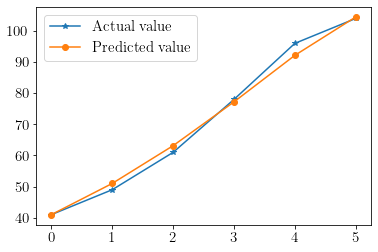

In [ ]:
# GM(2,1)例题程序
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

plt.rc('font', size=15)
plt.rc('font', family='SimHei')

x0 = np.array([41,49,61,78,96,104])


# 求级比
n = len(x0)
jibi = x0[:-1]/x0[1:]
bound1 = [jibi.min(), jibi.max()] # 级比范围
bound2 = [np.exp(-2/(n+1)), np.exp(2/(n+1))] # 级比容许范围
if bound1[0] > bound2[0] and bound1[-1] < bound2[-1]:
    print("级比符合要求")
else:
    print("级比不符合要求")

x1 = np.cumsum(x0)  # 计算1-AGO序列
z = 0.5*(x1[1:]+x1[:-1]) # 计算均值生成序列
B = np.vstack([-x0[1:],-z,np.ones(n-1)]).T
u = np.linalg.pinv(B)@np.diff(x0)  #最小二乘法拟合参数
print("参数u：", u)

sp.var('t')
sp.var('x',cls=sp.Function)  #定义符号变量和函数
eq = x(t).diff(t,2) + u[0]*x(t).diff(t) + u[1]*x(t) - u[2]
s = sp.dsolve(eq,ics={x(0):x0[0],x(5):x1[-1]})  #求微分方程符号解
xt = s.args[1]  #提取解的符号表达式
print('xt=',xt)
fxt = sp.lambdify(t,xt,'numpy')  #转换为匿名函数

yuce1 = fxt(np.arange(n))  #求预测值
yuce = np.hstack([x0[0],np.diff(yuce1)])  #还原数据
epsilon = x0-yuce[:n]  #计算已知数据预测的残差
delta = abs(epsilon/x0)  #计算相对误差
print('相对误差：', np.round(delta*100, 2))  #显示相对误差

plt.plot(np.arange(n), x0, '*-')
plt.plot(np.arange(n), yuce, 'o-')
plt.legend(('Actual value', 'Predicted value'))
plt.show()